# 1 Morfologia Matemática

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from skimage.filters.rank import maximum, minimum, gradient
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk, ball, square, erosion, dilation, closing, opening 
from skimage import io,img_as_float, img_as_ubyte

In [2]:
def data_info(img):
    print(f"Classe: {type(img)}")
    print(f"Tipo de variável: {img.dtype}")
    print(f"Min, max: {img.min(),img.max()}")
    print(f"Dimensões: {img.shape}")

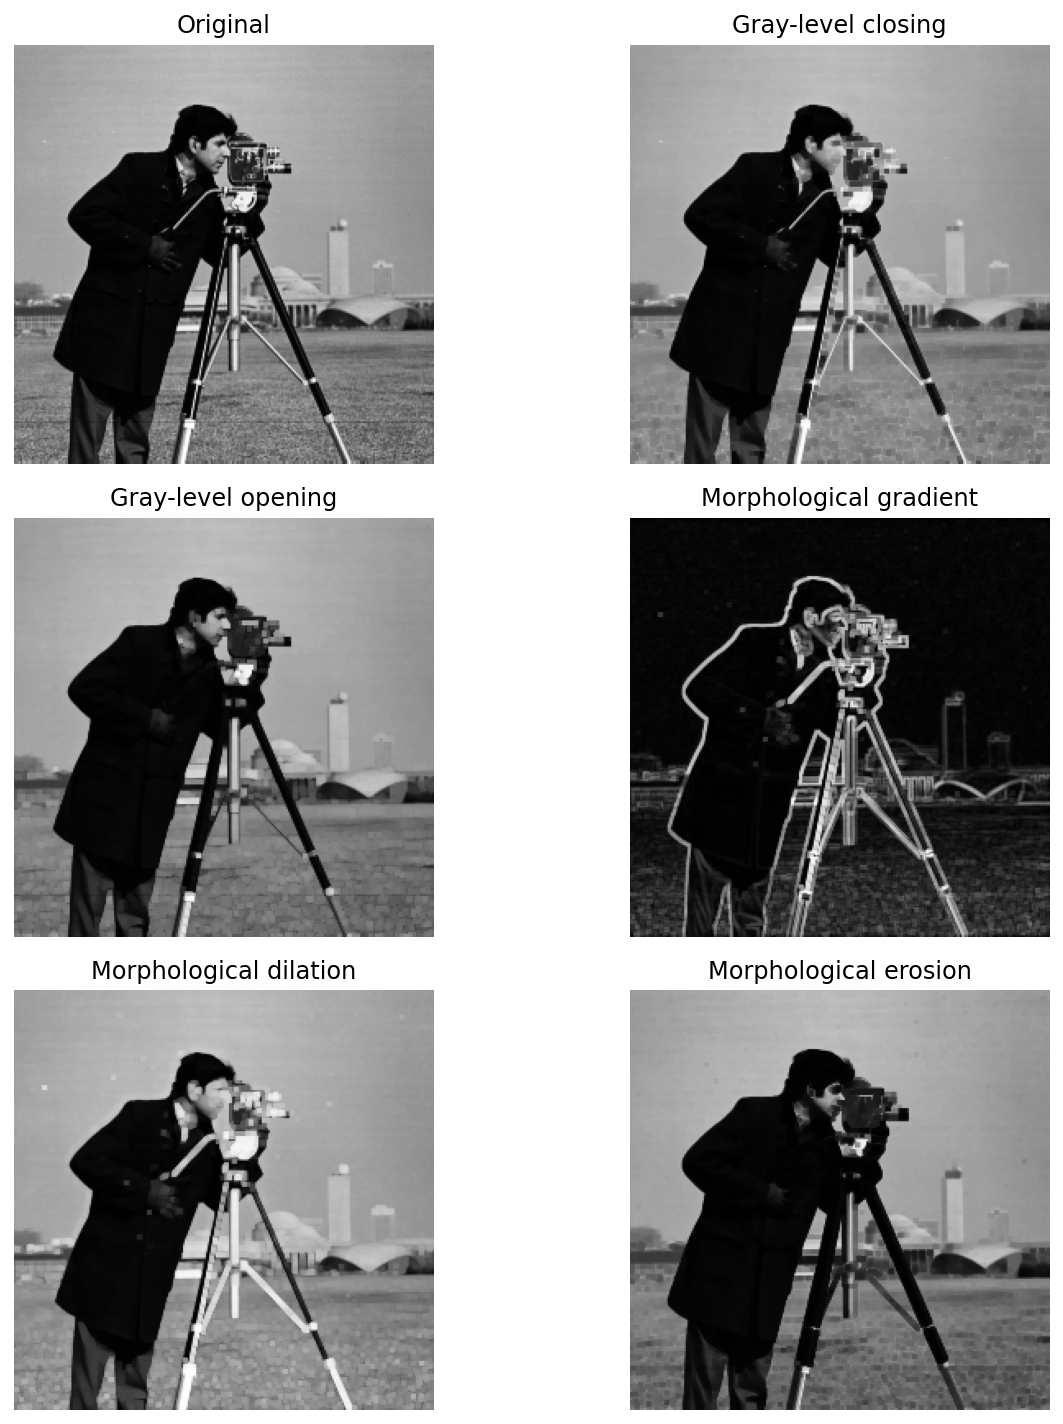

In [3]:
cameraman = io.imread('cameraman.tif')
radius = 3
selem  = square(radius)

Erode = erosion(cameraman,selem)#minimum(cameraman,selem)
#dilate = maximum(cameraman,selem)
Dilate = dilation(cameraman,selem)
Close = closing(cameraman,selem)#maximum(erode,selem)
Open = opening(cameraman,selem)#minimum(dilate,selem)
Grad    = gradient(cameraman,selem)

# display results
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(cameraman, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(Close, cmap=plt.cm.gray)
ax[1].set_title('Gray-level closing')

ax[2].imshow(Open, cmap=plt.cm.gray)
ax[2].set_title('Gray-level opening')

ax[3].imshow(Grad, cmap=plt.cm.gray)
ax[3].set_title('Morphological gradient')

ax[4].imshow(Dilate, cmap=plt.cm.gray)
ax[4].set_title('Morphological dilation')

ax[5].imshow(Erode, cmap=plt.cm.gray)
ax[5].set_title('Morphological erosion')

for a in ax:
    a.axis('off')

plt.tight_layout()

Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (16, 205)
Dimensões: (174, 314)
Classe: <class 'numpy.ndarray'>
Tipo de variável: bool
Min, max: (False, True)
Dimensões: (174, 314)


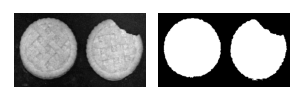

In [9]:
x     = io.imread('cookies.tif')
x_bin = x > 100
data_info(x)
data_info(x_bin)

fig, axes = plt.subplots(1,2,figsize=(2,2),constrained_layout=True)

axes[0].imshow(x,cmap='gray')
axes[1].imshow(x_bin,cmap='gray')

for ax in axes:
    ax.axis('off')

O biscoito quebrado é ligeiramente menor que o biscoito inteiro. A ideia é aplicar uma erosão grande o suficiente para remover completamente o biscoito quebrado e manter um marcador do biscoito inteiro. Depois, aplica-se a dilatação com um EE ligeiramente maior que o usado na erosão.
O resultado será o biscoito inteiro reconstruído, mas ligeiramente maior que a sua versão binária original. Na subtração no top-hat elima-se o biscoito inteiro, restando o biscoito quebrado.

In [37]:
radiusEro = 60
radiusDil = 65
selemEro  = disk(radiusEro)
selemDil  = disk(radiusDil)

Erode  = erosion(x_bin,selemEro)
Dilate = dilation(Erode,selemDil)
Erode  = img_as_ubyte(Erode)
Dilate  = img_as_ubyte(Dilate)
opth   = img_as_ubyte(x_bin) - Dilate
Bc     = img_as_ubyte(x_bin) - opth #%marcadores do biscoito inteiro

data_info(Erode)
data_info(Dilate)
data_info(opth)
data_info(Bc)

Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (0, 255)
Dimensões: (174, 314)
Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (0, 255)
Dimensões: (174, 314)
Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (0, 255)
Dimensões: (174, 314)
Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (0, 255)
Dimensões: (174, 314)


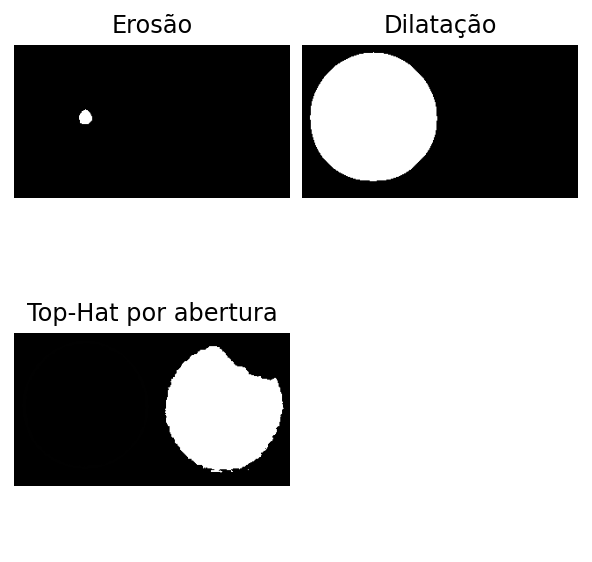

In [38]:
fig, axes = plt.subplots(2,2,figsize=(4,4),constrained_layout=True)

axes[0,0].imshow(Erode,cmap='gray')
axes[0,0].set_title("Erosão")
axes[0,1].imshow(Dilate,cmap='gray')
axes[0,1].set_title("Dilatação")
axes[1,0].imshow(opth,cmap='gray')
axes[1,0].set_title("Top-Hat por abertura")
#axes[1,1].imshow(Bc,cmap='gray')
#axes[1,1].set_title("Marcadores biscoito inteiro")

a = np.ravel(axes)
for ax in a:
    ax.axis('off')

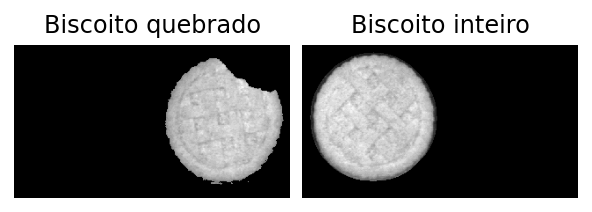

In [40]:
#Close  = closing(cameraman,selem)#maximum(erode,selem)
#Open = opening(cameraman,selem)#minimum(dilate,selem)
#Grad    = gradient(cameraman,selem)


#%Recuperando o biscoito quebrado
Bq = img_as_float(opth) * x

#%Recuperando o biscoite inteiro
B = img_as_float(Bc) * x

fig, axes = plt.subplots(1,2,figsize=(4,4),constrained_layout=True)

axes[0].imshow(Bq,cmap='gray')
axes[0].set_title("Biscoito quebrado")
axes[1].imshow(B,cmap='gray')
axes[1].set_title("Biscoito inteiro")
for ax in axes:
    ax.axis('off')

Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (0, 255)
Dimensões: (174, 314)
Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (16, 205)
Dimensões: (174, 314)
Classe: <class 'numpy.ndarray'>
Tipo de variável: float64
Min, max: (0.06274509803921569, 1.7411764705882353)
Dimensões: (174, 314)


(-0.5, 313.5, 173.5, -0.5)

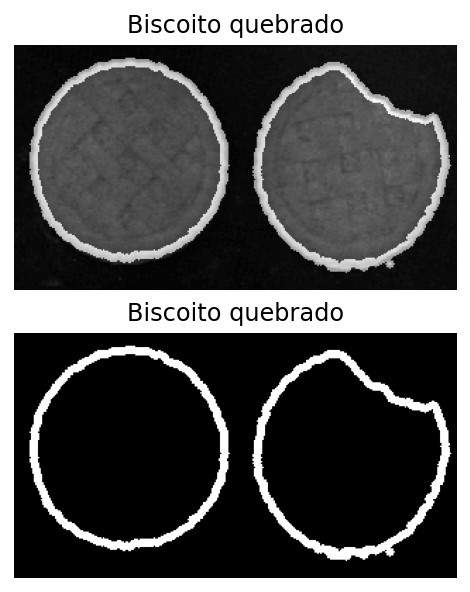

In [50]:
#%Detectando a fronteira
selemF   = disk(3)
F        = gradient(img_as_ubyte(x_bin),selemF)
data_info(F)
data_info(x)
xF       = img_as_float(x) + img_as_float(F) #%adicionando as bordas à imagem

data_info(xF)

fig, axes = plt.subplots(2,1,figsize=(4,4),constrained_layout=True)

axes[0].imshow(xF,cmap='gray')
axes[0].set_title("Biscoito quebrado")
axes[0].axis('off')

axes[1].imshow(F,cmap='gray')
axes[1].set_title("Biscoito quebrado")
axes[1].axis('off')